# Building a Basic Neural Network from Scratch

In this notebook, I create a basic neural network using my own neural network library.
The network has one hidden layer of 30 neurons, and uses a sigmoid activation function.
I built this network to make sure all the basic components of my ML library were working properly, before tackling more advanced architectures.

The network is trained and evaluated on the MNIST and Fashion MNIST datasets using the quadratic loss function.
The basic network achieves 94.0% accuracy on MNIST and 85.4% on Fashion MNIST (when all cells are run sequentially with random seed 1).

## Load MNIST data

In [1]:
from typing import *
import numpy as np
from matplotlib import pyplot as plt
from data_loader import load_data

In [2]:
np.set_printoptions(suppress=True, precision=2)
np.random.seed(1)

In [3]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("mnist")

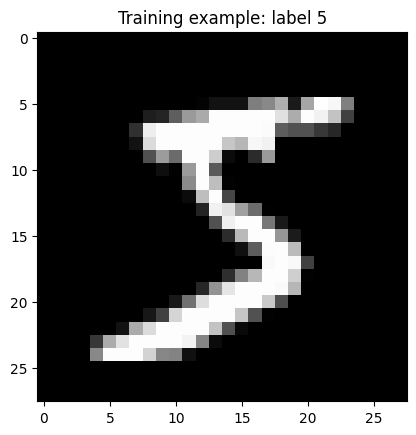

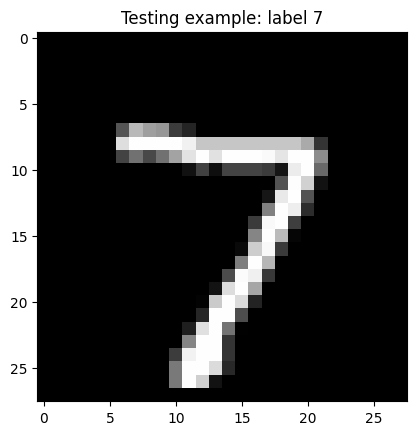

In [4]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [5]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Initialize the network

In [6]:
from network import *
from layers import *
from loss import *

In [7]:
layers = [
    Dense(784, 30),
    Sigmoid(30),
    Dense(30, 10),
    Sigmoid(10),
]

network = Network(
    layers,
    learning_rate=0.05,
    mini_batch_size=10
)

### Feed forward with random parameters

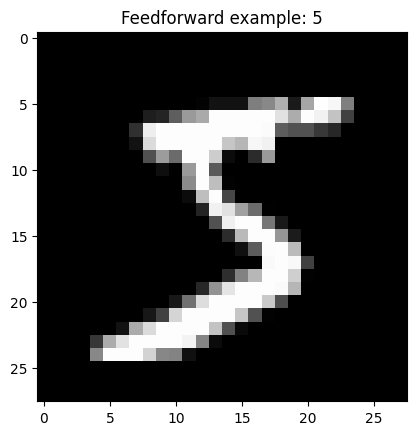

Network output: [0.19 0.19 0.72 0.48 0.71 0.67 0.94 0.73 0.75 0.56]


In [8]:
# network.reset()
image, label = training_data[0]

plt.imshow(image.reshape((28, 28)), interpolation="nearest", cmap='gray')
plt.title("Feedforward example: " + str(np.argmax(label)))
plt.show()
network.set_training(False)
print("Network output:", network.forward(image))

As expected, the network outputs 10 random numbers from 0 to 1.

## Train the network on MNIST

In [9]:
network.reset()
# Setting training to false speeds up forward passes, as the network does not
# have store information necessary for backpropagation.
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs could yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=MSE(),
    test_data=testing_data
)

Epoch 0: 1009 / 10000 (10.1%)
Epoch 1: 8309 / 10000 (83.1%)
Epoch 2: 8874 / 10000 (88.7%)
Epoch 3: 9045 / 10000 (90.5%)
Epoch 4: 9101 / 10000 (91.0%)
Epoch 5: 9153 / 10000 (91.5%)
Epoch 6: 9187 / 10000 (91.9%)
Epoch 7: 9220 / 10000 (92.2%)
Epoch 8: 9241 / 10000 (92.4%)
Epoch 9: 9276 / 10000 (92.8%)
Epoch 10: 9287 / 10000 (92.9%)
Epoch 11: 9306 / 10000 (93.1%)
Epoch 12: 9326 / 10000 (93.3%)
Epoch 13: 9337 / 10000 (93.4%)
Epoch 14: 9354 / 10000 (93.5%)
Epoch 15: 9364 / 10000 (93.6%)
Epoch 16: 9377 / 10000 (93.8%)
Epoch 17: 9375 / 10000 (93.8%)
Epoch 18: 9386 / 10000 (93.9%)
Epoch 19: 9401 / 10000 (94.0%)
Epoch 20: 9402 / 10000 (94.0%)
Epoch 21: 9412 / 10000 (94.1%)
Epoch 22: 9421 / 10000 (94.2%)
Epoch 23: 9417 / 10000 (94.2%)
Epoch 24: 9443 / 10000 (94.4%)
Epoch 25: 9427 / 10000 (94.3%)
Epoch 26: 9435 / 10000 (94.3%)
Epoch 27: 9440 / 10000 (94.4%)
Epoch 28: 9446 / 10000 (94.5%)
Epoch 29: 9454 / 10000 (94.5%)
Epoch 30: 9459 / 10000 (94.6%)


The network is able to achieve a test accuracy of 94.6%.

### Visualize weights

Each 28x28 image below represents the 784 weights connected from all of the input neurons to a given hidden neuron.
We can see the network has learned to detect edges and other important features through the first dense layer.

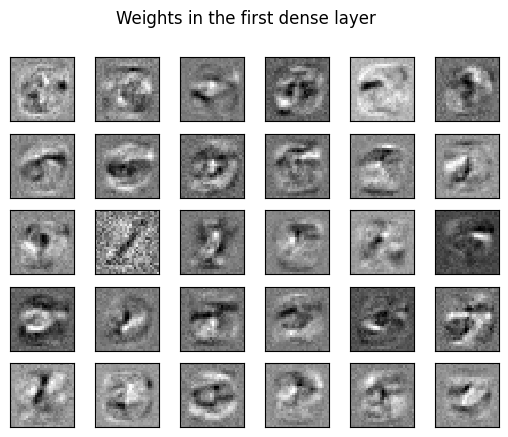

In [10]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

The weights in the second dense layer are slightly harder to interpret visually, but each image below is again a visualization of the 30 weights connecting all of the hidden neurons to a given output neuron.

The positions of the pixels in each of the ten images below correspond to the positions of the hidden neurons in the grid above.
For example, the top left pixel in each of the images below represents the same hidden neuron as the top left image in the grid above.

There are some interesting connections. For example, when all cells are run sequentially, the pattern in second image from the right in the top row of images above vaguely resembles a handwritten 2, and the corresponding pixel is bright in the plot of the weights connected to the output neuron with index 2.

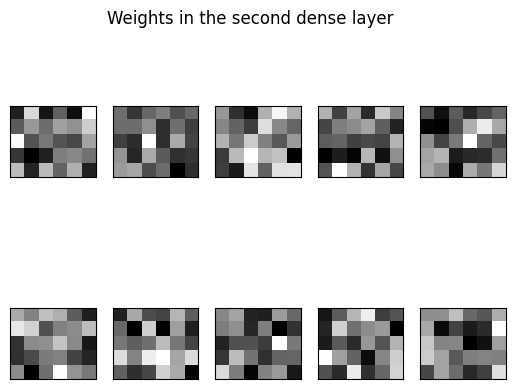

In [11]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

### Test the Network on My Handwriting

The following code tests the model's performance on my own handwriting.

In [12]:
from matplotlib.image import imread

In [13]:
images = []
for i in range(10):
    image = imread("my_handwriting/" + str(i) + ".jpg")
    # Convert image to grayscale
    image = (0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2])
    image /= 256
    images.append(image)

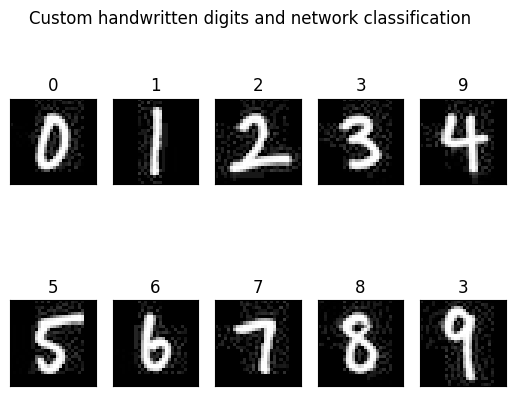

In [14]:
network.set_training(False)

fig, axes = plt.subplots(2, 5)
fig.suptitle("Custom handwritten digits and network classification")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = images[i]
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")
    ax.set_title(str(np.argmax(network.forward(im.flatten()))))

plt.show()

The network correctly classifies most of my handwritten digits. The extra noise in my images may have lowered the accuracy slightly.

## Load Fashion MNIST data

In [15]:
# Could take 10 to 20 seconds
train_images, train_labels, test_images, test_labels = load_data("fashion_mnist")

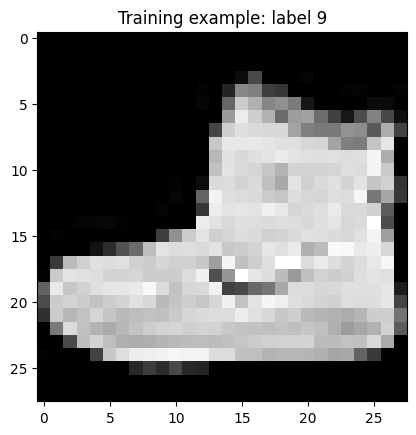

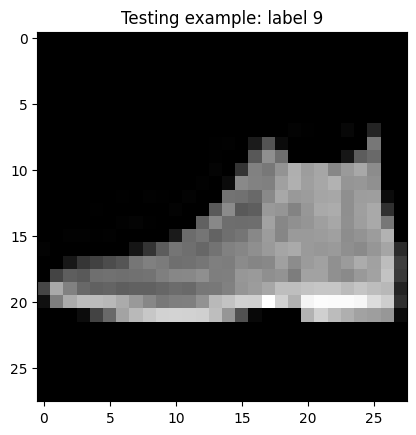

In [16]:
image, label = train_images[0], train_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Training example: label " + str(np.argmax(label)))
plt.show()

image, label = test_images[0], test_labels[0]
plt.imshow(image, interpolation="nearest", cmap='gray')
plt.title("Testing example: label " + str(label))
plt.show()

#### Flatten images & collect into tuples

In [17]:
training_data = [(x.flatten(), y) for x, y in zip(train_images, train_labels)]
testing_data = [(x.flatten(), y) for x, y in zip(test_images, test_labels)]

## Train the network on Fashion MNIST

In [18]:
network.reset()
network.set_training(True)

# The testing accuracy on Epoch 0 should be ~10% when correctly initialized.
correct = network.evaluate(testing_data)
percent = round(correct / 100, 1)
print(f"Epoch 0: {correct} / 10000 ({percent}%)")

# Training for more epochs will yield better results.
# This example is just meant to demonstrate the network is able to learn
# correctly.
network.train(
    epochs=30,
    training_data=training_data, 
    loss=MSE(),
    test_data=testing_data
)

Epoch 0: 1078 / 10000 (10.8%)
Epoch 1: 7472 / 10000 (74.7%)
Epoch 2: 7938 / 10000 (79.4%)
Epoch 3: 8095 / 10000 (81.0%)
Epoch 4: 8177 / 10000 (81.8%)
Epoch 5: 8241 / 10000 (82.4%)
Epoch 6: 8307 / 10000 (83.1%)
Epoch 7: 8328 / 10000 (83.3%)
Epoch 8: 8339 / 10000 (83.4%)
Epoch 9: 8374 / 10000 (83.7%)
Epoch 10: 8398 / 10000 (84.0%)
Epoch 11: 8404 / 10000 (84.0%)
Epoch 12: 8465 / 10000 (84.7%)
Epoch 13: 8470 / 10000 (84.7%)
Epoch 14: 8469 / 10000 (84.7%)
Epoch 15: 8458 / 10000 (84.6%)
Epoch 16: 8505 / 10000 (85.0%)
Epoch 17: 8509 / 10000 (85.1%)
Epoch 18: 8522 / 10000 (85.2%)
Epoch 19: 8545 / 10000 (85.5%)
Epoch 20: 8536 / 10000 (85.4%)
Epoch 21: 8553 / 10000 (85.5%)
Epoch 22: 8542 / 10000 (85.4%)
Epoch 23: 8528 / 10000 (85.3%)
Epoch 24: 8570 / 10000 (85.7%)
Epoch 25: 8578 / 10000 (85.8%)
Epoch 26: 8595 / 10000 (86.0%)
Epoch 27: 8601 / 10000 (86.0%)
Epoch 28: 8598 / 10000 (86.0%)
Epoch 29: 8605 / 10000 (86.1%)
Epoch 30: 8610 / 10000 (86.1%)


The network is able to attain a test accuracy of 86.1%.

### Visualize weights

The weights are visualized similar to the MNIST example. Again, we can see the network has learned some interesting visual features.

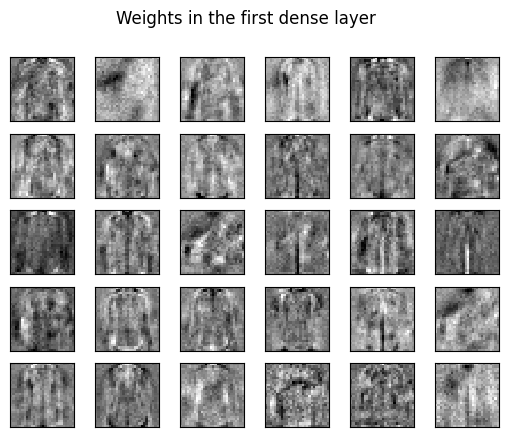

In [19]:
fig, axes = plt.subplots(5, 6)
fig.suptitle("Weights in the first dense layer")
for i in range(30):
    ax = axes[i // 6, i % 6]
    im = network.layers[0].weights[i].reshape(28, 28)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")

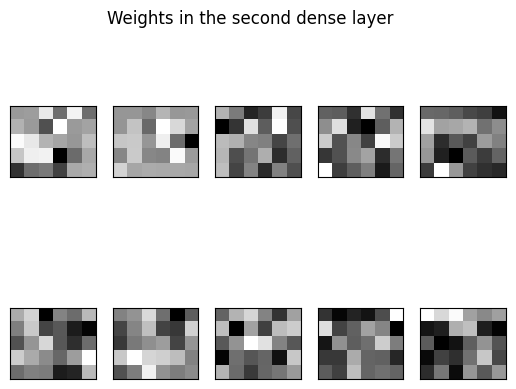

In [20]:
fig, axes = plt.subplots(2, 5)
fig.suptitle("Weights in the second dense layer")
for i in range(10):
    ax = axes[i // 5, i % 5]
    im = network.layers[2].weights[i].reshape(5, 6)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(im, interpolation="nearest", cmap="gray")